### Copyright (C) Infineon Technologies AG 2025
 
Use of this file is subject to the terms of use agreed between (i) you or the company in which ordinary course of 
business you are acting and (ii) Infineon Technologies AG or its licensees. If and as long as no such terms of use
are agreed, use of this file is subject to following:
 
This file is licensed under the terms of the Boost Software License. See the LICENSE file in the root of this repository
for complete details.

## AI Enhanced PID Example

This example demonstrates, Propotional-Integral-Derivative (PID) controller refining the execution of the planned trajectory. Controller in that case is "enhanced" by simple MLP network, which is tuning the controller in the real time, i.e., it modifies the PID gains. This approach enables to achieve higher driving comfort and adaptability to unseen scenarios as apposed to the conventional controller with constant parameters. The PID Controller has been implemented in Simulink and converted into binary FMU model. Then, we are making use FMPy library enabling model loading and execution. The results of model execution are plotted on seperate graphs, i.e., we are plotting P, I, D coefficients and steering angle for both controller variants. Plots include also cross-track error (CTE), which is a setpoint for the controller.

### Dataset Overview

We use the dataset collected in the simulation environment, i.e., IPG CarMaker. The dataset consists of 138 samples representing dynamic vehicle parameters and shape of the driven trajectory mapped into correspoding PID gains.

### Notebook Structure

1. **Import function definitions**
2. **Data Loading and Preprocessing**
3. **Model Definition**
4. **Model Creation and Training**
5. **Do an Exemplary Prediction**
6. **Model Evaluation**
7. **Plot Learning Curves**
8. **Perform a Simulation in AI mode**
9. **Perform a Simulation in Non-AI mode**
10. **Plot Simulation Results**
11. **Export and Save Model and Data**
12. **Compiling the Model for AURIX&trade;**

#### Import necessary functions
- Add the parent directory to the Python path so we can import from CentralScripts
- Import helper functions for model definition, data loading, preporcessing, benchmarking etc.

In [30]:
import sys
import os

parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from CentralScripts.helper_functions import *
from modelling_helper import *

#### Data Loading and Preprocessing

- Data is loaded into numpy arrays
- Data is normalized for better model training, data normalziation is being done in the load_data() function

In [31]:
# Load and preprocess training and evaluation data
data_x, data_y, eval_x, eval_y = load_data()

INFO:root:DATA LOADED SUCCESSFULLY
INFO:root:LABELS LOADED SUCCESSFULLY


#### Model Definition

This code snippet defining simple MLP network consisting of three layers is included in ```modelling_helper.py``` file in ```KerasModel``` class. You are invited to experiment with neural network parameters and define your own model.

#### Model Creation and Training
- TensorFlow model is created
- TensorFlow model is trained
- Model prediction is calculated for given sample

In [32]:
# Neural Network in TensorFlow framework
origin = "tf"

# Neural Network model is instantiated
model = get_model(origin)

# Choose your model_name
model_name = "pid_model"

# Add an exemplary input as numpy array
input_target = data_x[20]  # Example input for the model
input_target = input_target.astype(np.float32)

# Train your model
model, history = train_model(model, data_x, data_y)
model.summary()

# Get exemplary predictions
output_target = get_predictions(origin, model, input_target)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 62.1952 - val_loss: 56.8988
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 61.8496 - val_loss: 56.5791
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 61.5061 - val_loss: 56.2701
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 61.1718 - val_loss: 55.9687
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 60.8403 - val_loss: 55.6757
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 60.5212 - val_loss: 55.3892
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 60.2068 - val_loss: 55.1021
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 59.8877 - val_loss: 54.8118
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 59.5623 - val_loss: 54.5171
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 59.2271 - val_loss: 54.2157
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 58.8858 - val_loss: 53.9101
Epoch 12/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step -

Model: "keras_model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,795 (10.92 KB)

 Trainable params: 931 (3.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,864 (7.29 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


#### Do an Exemplary Prediction

- It shows how to do the prediction on single data sample

In [33]:
input_sample = tf.convert_to_tensor(data_x[20].reshape(1, 10))

model.predict(input_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[8.764637, 7.432658, 5.483766]], dtype=float32)

#### Model Evaluation

- Perform an evaluation on test dataset (it calcualtes MSE)

In [34]:
eval_res = model.evaluate(eval_x, eval_y)
print("res   ", eval_res)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 4.1768
res    4.1767730712890625


#### Plot Learning Curves

- Plots validation and training curvers

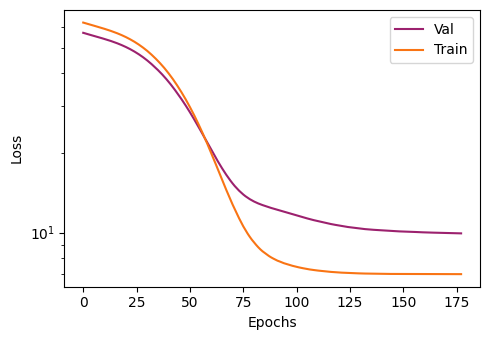

In [35]:
import matplotlib.pyplot as plt

%matplotlib inline
fig, ax = plt.subplots(figsize=(5, 3.5))
ax.set_yscale("log")
ax.plot(
    history.epoch, history.history["val_loss"], label="Val", color=COLORS["BERRY_MAIN"]
)
ax.plot(history.epoch, history.history["loss"], label="Train", color=COLORS["SUN_MAIN"])
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.tight_layout()

#### Perform a Simulation in AI mode

 - AI model is passed to the simulation function
 - AI algorithm tunes a conventional Proportional-Integral-Derivative (PID) controller in the real time
 - Graph below depicts P, I and D coefficients, cross-track error (CTE) and steering angle
 - It can be noticed P, I and D coefficients are changing during execution what increases safety and driving comfort

In [36]:
res_ai = simulate_custom_input(
    input_paths=input_data_paths,
    model=model,
    show_plot=False,
    batch_prediction=batch_prediction,
    ai_mode=True,
)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step


#### Perform a Simulation in non-AI mode

- In that case ```ai_mode``` argument of ```simulate_custom_input``` function is set to ```False```
- P, I, D coefficient are constant
- Steering angle is less stable (it includes jerks)

In [37]:
res_non_ai = simulate_custom_input(
    input_paths=input_data_paths,
    model=model,
    show_plot=False,
    batch_prediction=batch_prediction,
    ai_mode=False,
)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step


#### Plot Simulation Results
- plot simulation results for both cases with ai enhancement and without
- it can be seen controller coefficient are changing during model execution what enables controller's adaptivity to unseen scenarios and increases driving comfort 

In [38]:
plot_stacked_results(res_ai, res_non_ai)

#### Export and Save Model and Data

We now export model, input, and output data: 
- the model will be converted into ONNX
- input, and output will be stored ad pb.

In [39]:
# export model and data as ONNX and pb
save_all(model_name, input_target, output_target, model, origin)
test_onnx_pb(model_name)

Directory already exists: out/pid_model/test_pid_model


INFO:tf2onnx.tfonnx:Using tensorflow=2.16.2, onnx=1.17.0, tf2onnx=1.16.1/15c810
INFO:tf2onnx.tfonnx:Using opset <onnx, 15>
INFO:tf2onnx.tf_utils:Computed 0 values for constant folding
INFO:tf2onnx.optimizer:Optimizing ONNX model
INFO:tf2onnx.optimizer:After optimization: Identity -2 (2->0)


Output matches expected output within tolerance.


#### Compiling the Model for AURIX&trade; 

We now generate a C file from the ONNX and convert this into an elf file next. The elf file is executed using the open source hardware emulator quemu to estimate the execution. The returned elf file is not meant to be flashed onto a real AURIX&trade;. We are plotting number of clock cycles required to execute a given model on the target platform.

In [40]:
# Check if the docker container is running. If not, start it.
ensure_docker_container()

Docker container 'confident_shtern' (from image 'docker-atv-sae-ai-public-registry.vih.infineon.com/tc_tools:V1.0.1.TriCore') is running at http://localhost:8080/convert


In [41]:
from CentralScripts.python_flask_client import CallTools

model_folder, onnx_model_file = get_output_paths(model_name)

for target in ["TC3", "TC4"]:
    tool = CallTools(
        folder=model_folder, url="http://localhost:8080/convert", target=target
    )
    tool.convert_model()

Target folder out/pid_model/test_pid_model/TC3 already exists
{'c_file.c': True, 'model_conversion.log': True, 'out.elf': True, 'testgen.c': True}
Target folder out/pid_model/test_pid_model/TC4 already exists
{'c_file.c': True, 'model_conversion.log': True, 'out.elf': True, 'testgen.c': True}


Found .log file in TC3 folder: model_conversion.log
Found .log file in TC4 folder: model_conversion.log


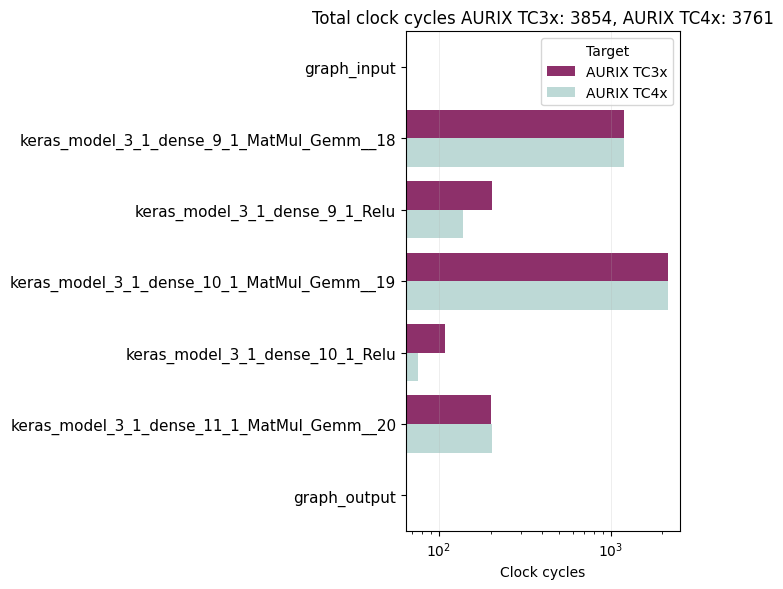

In [42]:
plot_execution_timing(model_name)